In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
X = np.loadtxt(r'C:\Users\aviva\Desktop\3D_deformation\Psn1Shutv2.txt', delimiter=' ')

In [21]:
t = X.T[0]
displ = X.T[1]

**Аппроксимируем закон движения поршня многочленом 4-ой степени**

In [22]:
B = [-0.47, -22.8, 121.08, -55.01] ## КОЭФФИЦИЕНТЫ МНОГОЧЛЕНА
T = t[-1]
print(T, '- ХАРАКТЕРНОЕ ВРЕМЯ')

1.3 - ХАРАКТЕРНОЕ ВРЕМЯ


Text(0, 0.5, 'displacement (mcm)')

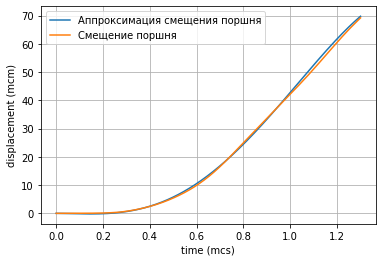

In [23]:
POL = B[0]*t + B[1]*t**2 + B[2]*t**3 + B[3]*t**4 
plt.plot(t,POL,label = 'Aппроксимация смещения поршня')
plt.plot(t,displ,label = 'Смещение поршня')
plt.legend()
plt.grid(True)
plt.xlabel('time (mcs)')
plt.ylabel('displacement (mcm)')

**Разложим в ряд Фурье аппроксимацию закона движения поршня по системе функций $$sin(\frac{\pi k t}{\tau}),$$
где $\tau$ = 1.3 (mcs) - характерное время:**


**Коэффициенты ряда посчитаны аналитически. Программный код нужен лишь для того, чтобы посчитать сумму.**

In [24]:
def fourier_s(t,n):
    A1 = [(-1)**k * T**2/(np.pi * k) for k in range(1, n)]
    A2 = [(-1)**(k+1) * T**3/(np.pi * k) + ((-1)**(k) -1) * 2 * T**3/(np.pi * k)**3 for k in range(1, n)]
    A3 = [-(-1)**k * T**4/(np.pi * k) + ((-1)**(k)) * 6 * T**4/(np.pi * k)**3 for k in range(1, n)]
    A4 = [-(-1)**k * T**5/(np.pi * k) + (-1)**k * 12*T**5/(np.pi * k)**3 - ((-1)**k - 1) * 24*T**5/(np.pi * k)**5 for k in range(1, n)]
    
    res = 0
    
    for i in range(1,n):
        res += (B[0] * A1[(i-1)] + B[1] * A2[(i-1)] + B[2] * A3[(i-1)] + B[3] * A4[(i-1)])/(T/2) * np.sin(np.pi/T * i * t)
    
    return(res)

def f_coef(n):
    A1 = [(-1)**k * T**2/(np.pi * k) for k in range(1, n+1)]
    A2 = [(-1)**(k+1) * T**3/(np.pi * k) + ((-1)**(k) -1) * 2 * T**3/(np.pi * k)**3 for k in range(1, n+1)]
    A3 = [-(-1)**k * T**4/(np.pi * k) + ((-1)**(k)) * 6 * T**4/(np.pi * k)**3 for k in range(1, n+1)]
    A4 = [-(-1)**k * T**5/(np.pi * k) + (-1)**k * 12*T**5/(np.pi * k)**3 - ((-1)**k - 1) * 24*T**5/(np.pi * k)**5 for k in range(1, n+1)]
      
    return ( (B[0] * A1[(i-1)] + B[1] * A2[(i-1)] + B[2] * A3[(i-1)] + B[3] * A4[(i-1)])/(T/2) )
    

In [25]:
F = fourier_s(t,1000)

# График суммы ряда

Text(0, 0.5, 'displacement (mcm)')

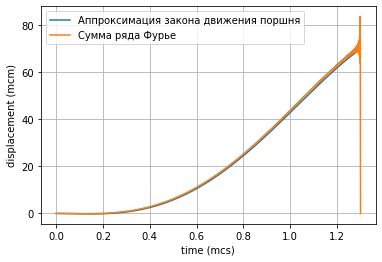

In [26]:
plt.plot(t,POL,label = 'Aппроксимация закона движения поршня')
plt.plot(t,F,label = 'Сумма ряда Фурье')
plt.legend()
plt.grid(True)
plt.xlabel('time (mcs)')
plt.ylabel('displacement (mcm)')

# График абсолютных значений коэффициентов ряда Фурье

Text(0, 0.5, '$A_k$')

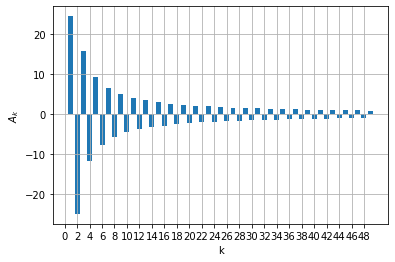

In [27]:
k = np.arange(1, 50)
A_k = []
for i in k:
    A_k.append((f_coef(i)))
A_k = np.array(A_k)

plt.bar(k, A_k)
plt.xlabel('k')
plt.xticks(np.arange(0,50,2))
plt.grid(True)
plt.ylabel('$A_k$')

**Характерную частоту определим как $\omega_x =\frac{2 \pi}{\tau}$**

In [28]:
w_c = 2*np.pi/T 
w_c

4.83321946706122

**Для того, чтобы оценить эффект искривления части зеркала (которое нанесено между двумя пластинами оконного материала), на которое светит лазерный луч нужно сначала определить в какой момент времени поперечная волна дойдет до середины пятна.
Обозначим это время $t_1$ (его можно определить из геометрии). Тогда отностительное изменение смещения вдоль оси Z точки в центре пятна и точки на краю пятна определится формулой (для решения в виде монохроматической волны и пятна диаметром 1 мкм):** 


$$|cos(k_x x_1 + k_z z - \omega_x(t + t_1) + \pi/2) - cos(k_x x_2 + k_z z - \omega_x (t + t_1) + \pi/2)|$$

**Где $(x_1,z)$ и $(x_2,z)$ - координаты левого края и центра пятна соотвественно.**



In [29]:
cl = 11.19*3.985
ct = 6.57*3.985
G = ct / cl
kx = (1/ct**2 - 1/cl**2)**(1/2) * w_c
kz = (w_c/cl)

In [30]:
def difference_t(z, x):
    s = x * 1/(1 - G**2)**(1/2)
    ds = (z - x * G * 1/ (1 - G**2)**(1/2))*G
    return((s + ds)/ct)

# Графики относительного изменения смещения

**График для $t = [0, \tau / 4]$ (отсчет времени ведется с момента $t_1$).**

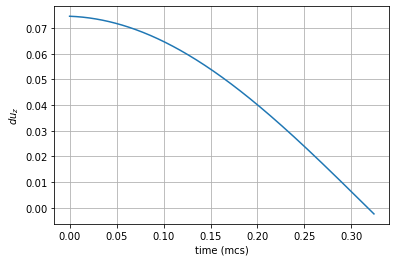

In [31]:
dt = difference_t(2.5, 5)
t1 = np.arange(0, 0.325, 0.001)
rel = (np.cos(kx*4.5 + kz*2.5 - w_c*(dt + t1) + np.pi/2)  - np.cos(kx*5 + kz*2.5 - w_c*(dt + t1) + np.pi/2) )

plt.plot(t1, rel) 
plt.xlabel('time (mcs)')
plt.ylabel('$d u_z$')
plt.grid(True)

**График для $t = [0, 2\tau]$ (отсчет времени ведется с момента $t_1$).**

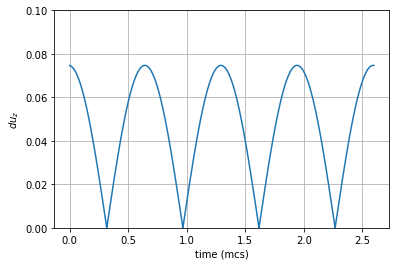

In [35]:
dt = difference_t(2.5, 5)
t1 = np.arange(0, 2.6, 0.001)
rel = (abs(np.cos(kx*4.5 + kz*2.5 - w_c*(dt + t1) + np.pi/2)  - np.cos(kx*5 + kz*2.5 - w_c*(dt + t1) + np.pi/2)))

plt.plot(t1, rel) 
plt.xlabel('time (mcs)')
plt.ylabel('$d u_z$')
plt.ylim(0,0.1)
plt.grid(True)